In [1]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
0: 加权蒸馏 0.880
1: 逐个蒸馏 0.850
2: 服务器交换参数 0.825
3: 服务器单独训练, 不使用公开数据 0.881
4: 服务器单独训练，使用公开数据 0.872
'''

data = {}
algorithms = [0, 1, 2]
for algo in algorithms:
    file_path = f'./res/mnist_model_1_algo_{algo}/alpha_0.5_T_6/server_commu_100_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[algo] = torch.load(file_path, map_location='cpu')

legends = {0: 'algorithm 0', 1: 'algorithm 1', 2: 'algorithm 2', 3: 'algorithm 3', 4: 'algorithm 4'}

print(data.keys())

dict_keys([0, 1, 2])


0.8423115611076355 [0.10301507264375687, 0.10301507264375687, 0.10341708362102509, 0.32231155037879944, 0.5786934494972229, 0.6409044861793518, 0.6439195871353149, 0.7062311768531799, 0.7180904150009155, 0.749849259853363, 0.7448241114616394, 0.7468341588973999, 0.7634170651435852, 0.7797989845275879, 0.7684422135353088, 0.7808040380477905, 0.782412052154541, 0.7937688231468201, 0.7935678362846375, 0.7951758503913879, 0.7930653095245361, 0.794874370098114, 0.7950753569602966, 0.7965828776359558, 0.8019095659255981, 0.8077386617660522, 0.802914559841156, 0.8017085194587708, 0.806934654712677, 0.8039196133613586, 0.8079397082328796, 0.8098492622375488, 0.8092462420463562, 0.8067336678504944, 0.8119598031044006, 0.8099497556686401, 0.8175879120826721, 0.8137688636779785, 0.8142713308334351, 0.8169848918914795, 0.8131658434867859, 0.8176884055137634, 0.8137688636779785, 0.8155778646469116, 0.8145728707313538, 0.8176884055137634, 0.820502519607544, 0.8171859383583069, 0.81939697265625, 0.81

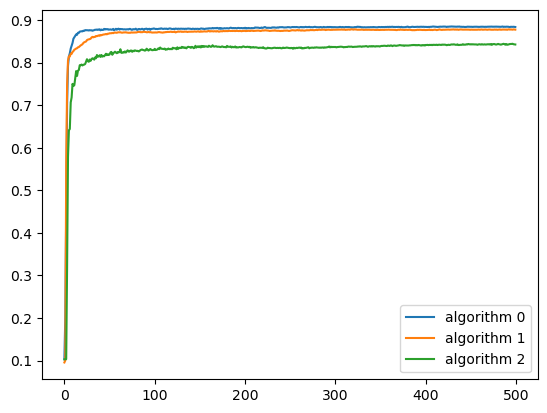

In [2]:
i = 2
for algo in algorithms:
    server_acc = data[algo]['server_acc']
    num_line = len(server_acc[0])
    x = numpy.arange(num_line)
    y = server_acc[i]
    plt.plot(x, y, label=legends[algo])
plt.legend()
print(y[-1], list(y))
plt.show()

0.8682076930999756 [0.09668341527382532, 0.12944723665714264, 0.25711892545223236, 0.5333668192227682, 0.6629145741462708, 0.8027135531107583, 0.8118257919947305, 0.8219430247942607, 0.8292127251625061, 0.83530988295873, 0.8438860774040222, 0.8467671473821003, 0.8498492439587911, 0.8534338275591533, 0.8549748659133911, 0.853199303150177, 0.8541038433710735, 0.8558459083239237, 0.8572194178899128, 0.8586599628130593, 0.8557788928349812, 0.8575544158617656, 0.8576884269714355, 0.8590284585952759, 0.8598994811375937, 0.8569848934809368, 0.857353428999583, 0.8578894535700479, 0.8584924538930259, 0.8595979809761047, 0.8568844199180603, 0.8573869466781616, 0.857889433701833, 0.858592967192332, 0.8593634764353435, 0.8560803929964702, 0.8571189045906067, 0.8579229513804117, 0.8579899271329243, 0.859564503033956, 0.8555108706156411, 0.8573534289995828, 0.8575879335403442, 0.8580569624900818, 0.8583249449729919, 0.8574539224306741, 0.8582244515419006, 0.8585259517033896, 0.8585929671923319, 0.85

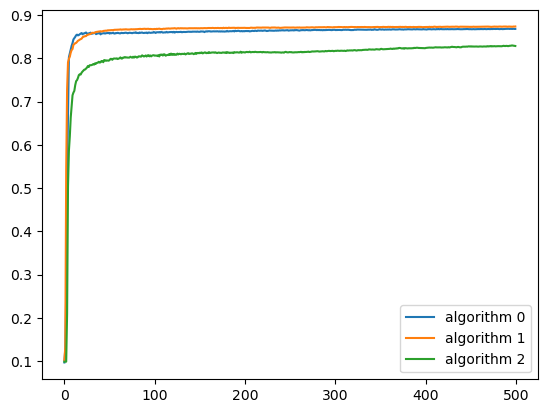

In [5]:
server_acc_mean = {}
num_line = len(data[algo]['server_acc'][0])
for algo in algorithms:
    server_acc_mean[algo] = numpy.zeros(num_line).tolist()
    for i in [0, 1, 2]:
        server_acc = data[algo]['server_acc']
        server_acc_mean[algo] += (numpy.array(server_acc[i]) / numpy.array(len(data[algo]['server_acc'])))
end_point = 500
x = numpy.arange(num_line)[:end_point]
for algo in algorithms:
    y = server_acc_mean[algo][:end_point]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

In [4]:
client_acc = data['client_acc']
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 0
y = client_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

KeyError: 'client_acc'

0.005566208157688379 [0.015191331505775452, 0.052990250289440155, 0.04453112557530403, 0.02823370322585106, 0.07179806381464005, 0.0263736043125391, 0.02912798896431923, 0.07305579632520676, 0.04115412384271622, 0.031670473515987396, 0.048597805202007294, 0.04494886100292206, 0.039044030010700226, 0.028449174016714096, 0.14001134037971497, 0.05033162981271744, 0.05599035695195198, 0.04586431011557579, 0.029438313096761703, 0.0225194301456213, 0.06743317097425461, 0.03863128647208214, 0.07181964814662933, 0.03808640316128731, 0.020912643522024155, 0.023513302206993103, 0.045788805931806564, 0.03335321694612503, 0.1750849187374115, 0.07323972880840302, 0.04056129604578018, 0.042967505753040314, 0.04613855108618736, 0.030460279434919357, 0.033133551478385925, 0.029194196686148643, 0.02099214680492878, 0.035342104732990265, 0.026768183335661888, 0.060253120958805084, 0.05661821365356445, 0.05758365988731384, 0.05549827218055725, 0.045249395072460175, 0.05661580711603165, 0.0531637370586395

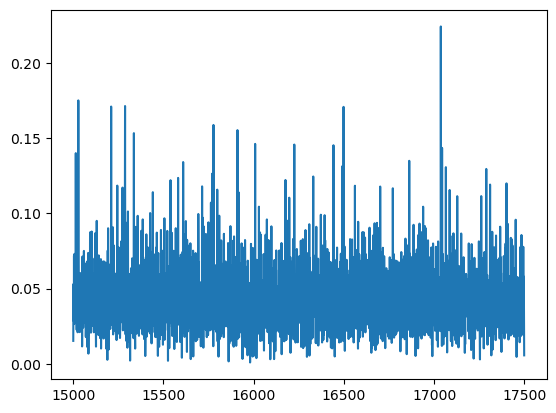

In [ ]:
client_loss = data['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 6
y = client_loss[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.9599999785423279 [0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.8050000071525574, 0.824999988079071, 0.824999988079071, 0.8299999833106995, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8449999690055847, 0.8349999785423279, 0.8449999690055847, 0.8549999594688416, 0.875, 0.85999995470047, 0.8650000095367432, 0.8799999952316284, 0.8700000047683716, 0.875, 0.8899999856948853, 0.8899999856948853, 0.875, 0.9099999666213989, 0.9099999666213989, 0.9149999618530273, 0.8849999904632568, 0.9099999666213989, 0.9199999570846558, 0.9049999713897705, 0.9249999523162842, 0.9199999570846558, 0.9300000071525574, 0.9249999523162842, 0.9249999523162842, 0.9350000023841858, 0.9249999523162842, 0.9399999976158142, 0.9199999570846558, 0.9149999618530273, 0.9300000071525574, 0.9350000023841858, 0.9350000023841858, 0.9

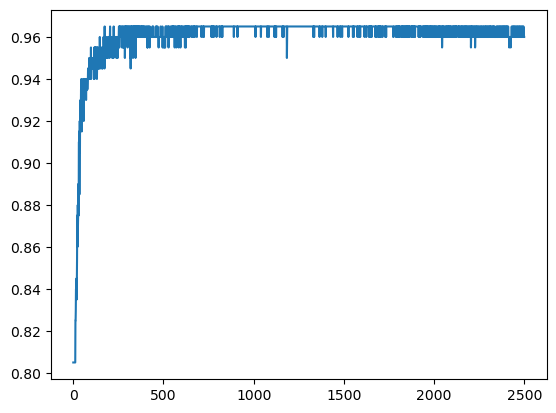

In [ ]:
train_acc = data['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 7
y = train_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()